<a href="https://colab.research.google.com/github/yabbou/python-data-science/blob/main/project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality Reduction & Feature Selection Project**
==

Introduction
==

**Research Question:** _To what extent can the independent variables predict the **average miles/gallon (MPG)** for a city car?_

**Variables:** The original data set includes 10 categorical variables and 16 numerical variables. There are 25 variables for independent variables. The `city-mpg` variable will serve as the dependent variable for our regression model.

**Summary:**

Step 1: Introduction

Step 2: Exploratory Data Analysis

Step 3: Data Cleaning

Step 4: Feature Selection

Step 5: Multiple Linear Regression

Step 6: Conclusion

Features:
1. **symboling**: the degree which is more risky than its price indicates. It ranges from -3 (safer) to 3 (more risky). 
2. **normalized-losses**: as compared to other cars. It is the relative, average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/specialty, etc.), and represents the average loss per car per year. In this case, the range of normalized_losses is from 65 to 256.

3. **make**: The makers of the brand. In this dataset-- alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

4. **fuel-type**: diesel, gas.

5. **aspiration**: std, turbo.
6. **num-of-doors**: four, two.
7. **body-style**: hardtop, wagon, sedan, hatchback, convertible.
8. **drive-wheels**: 4wd, fwd, rwd.
9. **engine-location**: front, rear.
10. **wheel-base**:the distance between the centers of the front and rear wheels (continuous from 86.6 120.9).

11. **length**: continuous from 141.1 to 208.1.
12. **width**: continuous from 60.3 to 72.3.
13. **height**: continuous from 47.8 to 59.8.
14. **curb-weight**: the weight of an automobile without occupants or baggage (continuous from 1488 to 4066).
15. **engine-type**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. **num-of-cylinders**: eight, five, four, six, three, twelve, two.
17. **engine-size**: continuous from 61 to 326.
18. **fuel-system**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. **bore**: size of cylinder for each car (continuous from 2.54 to 3.94).
20. **stroke**: the distance travelled by the piston in each cycle, continuous from 2.07 to 4.17.
21. **compression-ratio**: the ratio of the maximum to minimum volume in the cylinder of an internal combustion engine (continuous from 7 to 23).
22. **horsepower**: engine's power of each car (continuous from 48 to 288).
23. **peak-rpm**: the maximum revolutions per minute (continuous from 4150 to 6600).
24. **city-mpg**: continuous from 13 to 49. **THE TARGET VARIABLE**
25. **highway-mpg**: continuous from 16 to 54.
26. **price**: continuous from 5118 to 45400.

Detailed here: https://archive.ics.uci.edu/ml/datasets


Part 2: EDA
==

Here is a quick look of the data:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

cars_df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day3/Day3%20Data.csv")
cars_df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


Our data appears to have been gathered by less-than-professional data records. One column is unknown, others column names are numbers, others are shortened forms of likely common technical car terms. 

Let's first clarify the column names, based on the website data.

In [ ]:
COLUMNS=['Symboling', 'Normalized_Losses', 'Make', 'Fuel_Type','Aspiration','Num_Doors','Body_Style', 'Drive_Wheels','Engine_Location','Wheel_Base', 'Length','Width','Height','Curb_Weight','Engine_Type','Num_Cylinders','Engine_Size','Fuel_System','Bore','Stroke','Compression_Ratio', 'Horsepower','Peak_RPM','City_MPG','Highway_MPG','Price']
cars_df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day3/Day3%20Data.csv", names=COLUMNS)
cars_df.columns

Index(['Symboling', 'Normalized_Losses', 'Make', 'Fuel_Type', 'Aspiration',
       'Num_Doors', 'Body_Style', 'Drive_Wheels', 'Engine_Location',
       'Wheel_Base', 'Length', 'Width', 'Height', 'Curb_Weight', 'Engine_Type',
       'Num_Cylinders', 'Engine_Size', 'Fuel_System', 'Bore', 'Stroke',
       'Compression_Ratio', 'Horsepower', 'Peak_RPM', 'City_MPG',
       'Highway_MPG', 'Price'],
      dtype='object')

Let's see some statistics for the numeric variables _without unknown values_:

In [ ]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
Wheel_Base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
Length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
Width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
Height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
Curb_Weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
Engine_Size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
Compression_Ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
City_MPG,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
Highway_MPG,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


What are the unique values in our data? Any out of the ordinary?

In [ ]:
def displayUnique():
  COLS = cars_df.columns
  for x in range(COLS.shape[0]):
    print(COLS[x])
    print(np.unique(cars_df.iloc[:,x].sort_values(ascending=False)),'\n')
displayUnique()

Symboling
[-2 -1  0  1  2  3] 

Normalized_Losses
['101' '102' '103' '104' '106' '107' '108' '110' '113' '115' '118' '119'
 '121' '122' '125' '128' '129' '134' '137' '142' '145' '148' '150' '153'
 '154' '158' '161' '164' '168' '186' '188' '192' '194' '197' '231' '256'
 '65' '74' '77' '78' '81' '83' '85' '87' '89' '90' '91' '93' '94' '95'
 '98' '?'] 

Make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 

Fuel_Type
['diesel' 'gas'] 

Aspiration
['std' 'turbo'] 

Num_Doors
['?' 'four' 'two'] 

Body_Style
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon'] 

Drive_Wheels
['4wd' 'fwd' 'rwd'] 

Engine_Location
['front' 'rear'] 

Wheel_Base
[ 86.6  88.4  88.6  89.5  91.3  93.   93.1  93.3  93.7  94.3  94.5  95.1
  95.3  95.7  95.9  96.   96.1  96.3  96.5  96.6  96.9  97.   97.2  97.3
  98.4  98.8  99.1  99.2  99.4  99.5  

Some numeric columns store their numbers as strings. None appear null. After we replace the unknown rows with valid values, we could convert those columns to hold integers.

Part 3: Data Cleaning
==

Nulls?

In [ ]:
cars_df = cars_df.replace('?',np.NAN)
null_count = cars_df.isnull().sum()

print('Columns with null values:', [col for col in cars_df if cars_df.loc[:,col].isnull().sum()>0],'\n')
null_count = null_count[null_count>0]

def displayNullCount():
  null_count = cars_df.isnull().sum()
  null_count = null_count[null_count>0]
  print(null_count[null_count>0],'\n')

displayNullCount()
print(null_count/len(cars_df) *100)

Columns with null values: ['Normalized_Losses', 'Num_Doors', 'Bore', 'Stroke', 'Horsepower', 'Peak_RPM', 'Price'] 

Normalized_Losses    41
Num_Doors             2
Bore                  4
Stroke                4
Horsepower            2
Peak_RPM              2
Price                 4
dtype: int64 

Normalized_Losses    20.00000
Num_Doors             0.97561
Bore                  1.95122
Stroke                1.95122
Horsepower            0.97561
Peak_RPM              0.97561
Price                 1.95122
dtype: float64


Thankfully, the unknown values appear to correlate (besides for the `Normalized Losses`).

Before null column values are replaced, let's seperate the numeric columns from the categorical.

In [ ]:
def calcAndDisplayColumnTypes():  
  numeric_columns = []
  categorical_columns = []

  for i in cars_df.columns[:]:
    if(cars_df[i].dtype=='object'):
      categorical_columns.append(i)
    else:
      numeric_columns.append(i)
       
  print(len(numeric_columns),'Numeric variables:',numeric_columns)
  print(len(categorical_columns),'Categorical variables:',categorical_columns)

calcAndDisplayColumnTypes()

10 Numeric variables: ['Symboling', 'Wheel_Base', 'Length', 'Width', 'Height', 'Curb_Weight', 'Engine_Size', 'Compression_Ratio', 'City_MPG', 'Highway_MPG']
16 Categorical variables: ['Normalized_Losses', 'Make', 'Fuel_Type', 'Aspiration', 'Num_Doors', 'Body_Style', 'Drive_Wheels', 'Engine_Location', 'Engine_Type', 'Num_Cylinders', 'Fuel_System', 'Bore', 'Stroke', 'Horsepower', 'Peak_RPM', 'Price']


Some numeric columns are currently type `object`. We will change them to `float`.

In [ ]:
SHOULD_BE_NUMERIC_COLS = ['Bore', 'Stroke','Normalized_Losses', 'Horsepower','Price','Peak_RPM']
cars_df[SHOULD_BE_NUMERIC_COLS] = cars_df[SHOULD_BE_NUMERIC_COLS].astype('float')

calcAndDisplayColumnTypes()

16 Numeric variables: ['Symboling', 'Normalized_Losses', 'Wheel_Base', 'Length', 'Width', 'Height', 'Curb_Weight', 'Engine_Size', 'Bore', 'Stroke', 'Compression_Ratio', 'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Price']
10 Categorical variables: ['Make', 'Fuel_Type', 'Aspiration', 'Num_Doors', 'Body_Style', 'Drive_Wheels', 'Engine_Location', 'Engine_Type', 'Num_Cylinders', 'Fuel_System']


Imputation appears necessary to change some of the numeric columns from type string to float. Let's try that using the 'median' of each column.

Let's now check the statistics of the columns before we impute.

In [ ]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
Normalized_Losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
Wheel_Base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
Length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
Width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
Height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
Curb_Weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
Engine_Size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
Bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
Stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17


The most changed column will be `Normalized_Losses`, which has 
* a mean of	122
* a std dev of 35.44
* a 50% (median) of 115.

Let's keep an eye out that our basic imputation will not alter that too much.

In [ ]:
from sklearn.impute import SimpleImputer
numeric_columns_hardcoded = ['Symboling', 'Normalized_Losses', 'Wheel_Base', 'Length', 'Width', 'Height', 'Curb_Weight', 'Engine_Size', 'Bore', 'Stroke', 'Compression_Ratio', 'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Price']
categorical_columns_hardcoded = ['Make', 'Fuel_Type', 'Aspiration', 'Num_Doors', 'Body_Style', 'Drive_Wheels', 'Engine_Location', 'Engine_Type', 'Num_Cylinders', 'Fuel_System']

values = cars_df[numeric_columns_hardcoded].values
imputer = SimpleImputer(missing_values=np.NAN, strategy='median')

transformed_values = imputer.fit_transform(values)
cars_without_nulls_df = pd.DataFrame(transformed_values)
cars_without_nulls_df.columns = numeric_columns_hardcoded

cars_without_nulls_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
Normalized_Losses,205.0,120.600000,31.805105,65.00,101.00,115.00,137.00,256.00
Wheel_Base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
Length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
Width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
Height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
Curb_Weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
Engine_Size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
Bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
Stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17


The mean and standard devaition of `Normalized Losses` is slightly altered. Let's instead just drop the 20% of rows that contain null values.

In [ ]:
cars_df.dropna(axis='rows',inplace=True)
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,159.0,0.735849,1.193086,-2.00,0.000,1.00,2.00,3.00
Normalized_Losses,159.0,121.132075,35.651285,65.00,94.000,113.00,148.00,256.00
Wheel_Base,159.0,98.264151,5.167416,86.60,94.500,96.90,100.80,115.60
Length,159.0,172.413836,11.523177,141.10,165.650,172.40,177.80,202.60
Width,159.0,65.607547,1.947883,60.30,64.000,65.40,66.50,71.70
Height,159.0,53.899371,2.268761,49.40,52.250,54.10,55.50,59.80
Curb_Weight,159.0,2461.138365,481.941321,1488.00,2065.500,2340.00,2809.50,4066.00
Engine_Size,159.0,119.226415,30.460791,61.00,97.000,110.00,135.00,258.00
Bore,159.0,3.300126,0.267336,2.54,3.050,3.27,3.56,3.94
Stroke,159.0,3.236352,0.294888,2.07,3.105,3.27,3.41,4.17


Let us visualise the column data distributions:

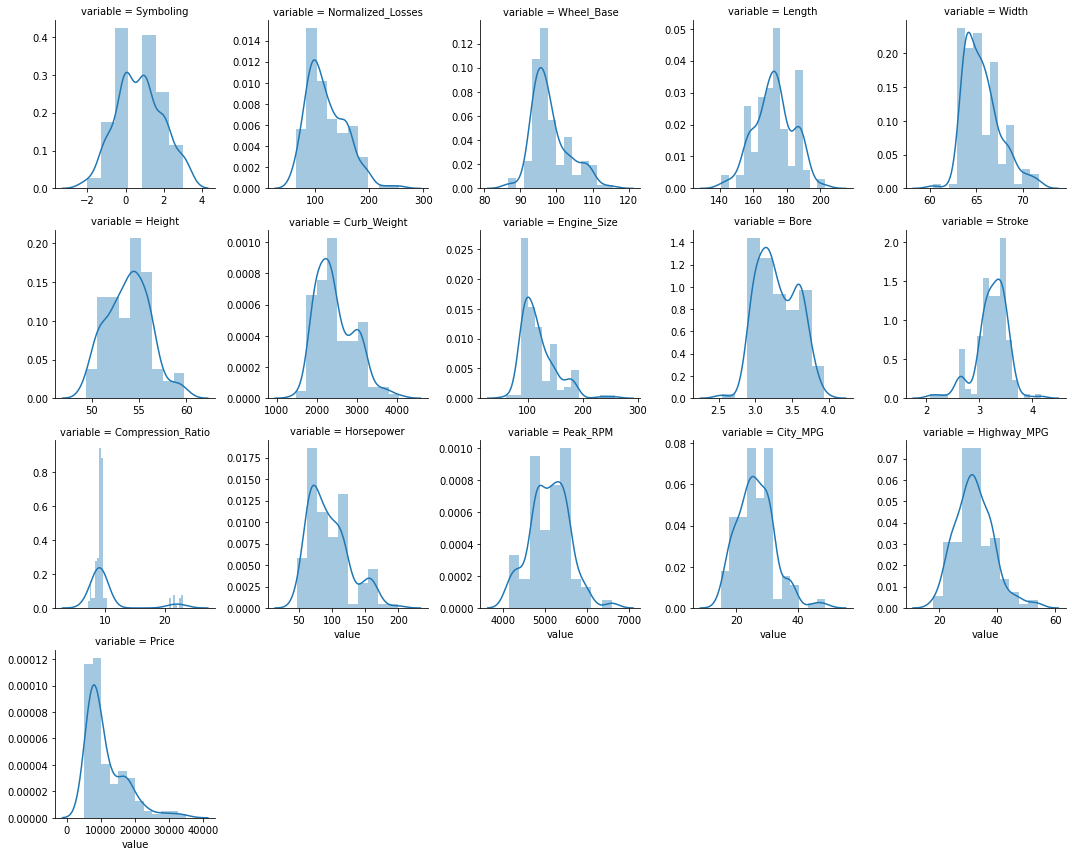

In [ ]:
nd = pd.melt(cars_df[numeric_columns_hardcoded])
numeric = sns.FacetGrid(nd, col='variable', col_wrap=5, sharex=False, sharey = False)
numeric.map(sns.distplot, 'value')

Most attributes _generally_ fit normal distribution besides `Compression_Ratio` and maybe `Bore`. 

* Compression ratio of 10 is very common, as seen in `.detailed()` above.

* Many are slightly skewed: the `Compression_Ratio`, `Engine_Size`, `Horsepower`, `Normalized_Losses`,`Price` and `Wheel_Base` variables are highly right skewed.

Removing outliers may eliminate the precise impact gained from all the data points, so outliers will be kept as well.

Here are the categorical column distributions:

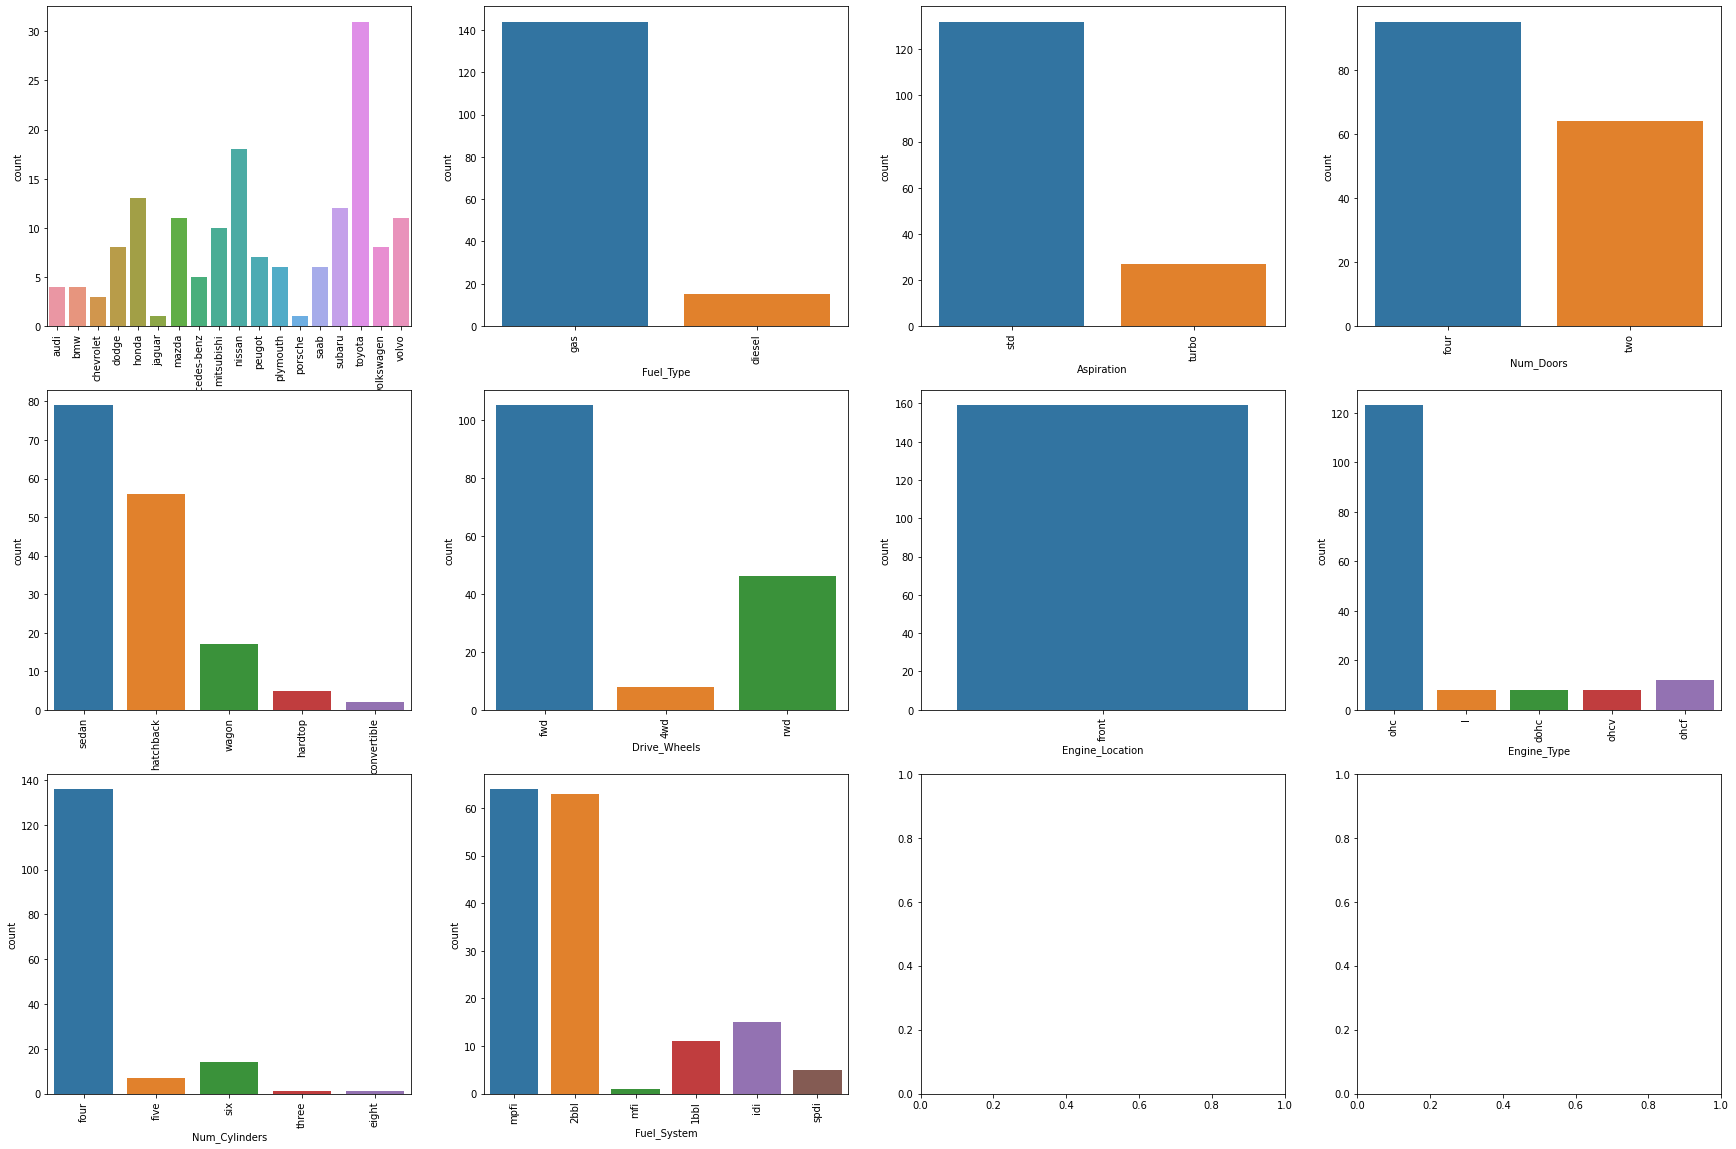

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(30, 20))
for variable, subplot in zip(categorical_columns_hardcoded, ax.flatten()):
    sns.countplot(cars_df[variable], ax=subplot) #countplot not facetgrid, bc categorical data is not continuous
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Mode is easily, visually identified here. And usually the most common value holds a _much_ greater frequency.


In [ ]:
mode = ''
print('Most common categorical column values:')
print('-------------------------------------')
for ca_col in categorical_columns_hardcoded:
  mode = cars_df.loc[:,ca_col].mode()[0]
  print(f'{ca_col:<15}: {mode}')

Most common categorical column values:
-------------------------------------
Make           : toyota
Fuel_Type      : gas
Aspiration     : std
Num_Doors      : four
Body_Style     : sedan
Drive_Wheels   : fwd
Engine_Location: front
Engine_Type    : ohc
Num_Cylinders  : four
Fuel_System    : mpfi


Let's visualize some of the column correlations.

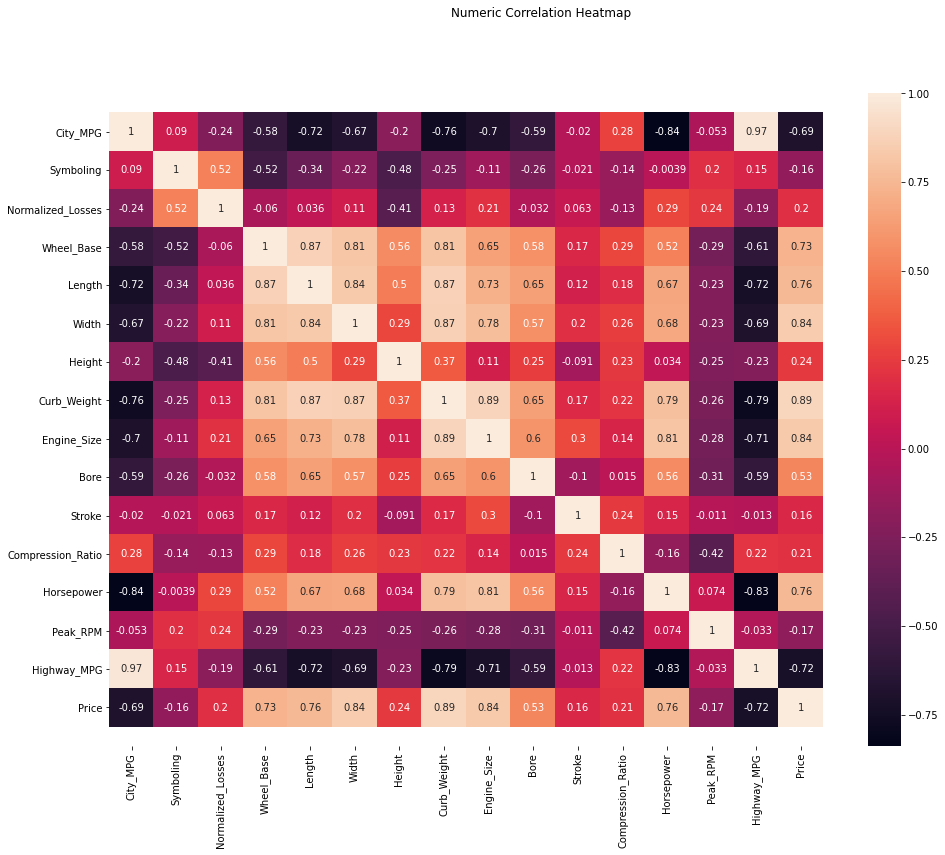

In [ ]:
fig = plt.figure(figsize=(16, 12)) 

MPG='City_MPG'
num_cols_reordered = numeric_columns_hardcoded.copy()
num_cols_reordered.remove(MPG)
num_cols_reordered.insert(0,MPG)

numeric_cars_df = cars_df.loc[:,num_cols_reordered]
corr = numeric_cars_df.corr()
sns.heatmap(corr, annot=True)

b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
fig.suptitle('Numeric Correlation Heatmap') 
plt.show()

Some variables indeed correlate with eachother, but primarily `Highway_MPG` and `Compression Ratio` (less so, but slightly) corelate with the `City MPG`. 

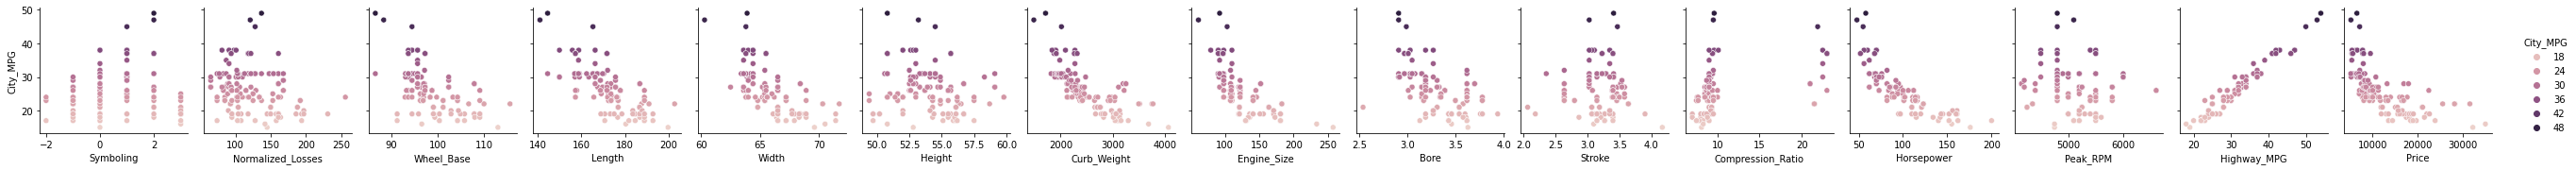

In [ ]:
sns.pairplot(numeric_cars_df, hue=MPG, y_vars=MPG)

Most variables do not appear to correlate to the `City_MPG`-- only the graphs that change horizontally as the MPG increases, like `Highway MPG`,  `Curb Height`, and `Price` (for example), more highly correlate. And specaifically the numeric columns, as they are continous, could be compared to eachother (at least without some noramilization).

Part 4: Feature Selection and Dimension Reduction
==

To select categorical variables to be used in the prediction model, the variables must be encoded in a manner that will treat them with some sort of continuity. But to create an individual column for each categorical column may result in very very many columns, so we will not create those extra columns. 

Instead, the data will be split into training and testing subsets. 30% of the data will be allocated for testing.



In [ ]:
numeric_cars_wo_mpg = numeric_cars_df.iloc[:,1:].copy()

X = numeric_cars_wo_mpg
y = numeric_cars_df.iloc[:,0].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

X_train.head()

,Symboling,Normalized_Losses,Wheel_Base,Length,Width,Height,Curb_Weight,Engine_Size,Bore,Stroke,Compression_Ratio,Horsepower,Peak_RPM,Highway_MPG,Price
77,2,161.0,93.7,157.3,64.4,50.8,1944,92,2.97,3.23,9.4,68.0,5500.0,38,6189.0
37,0,106.0,96.5,167.5,65.2,53.3,2236,110,3.15,3.58,9.0,86.0,5800.0,33,7895.0
18,2,121.0,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,48.0,5100.0,53,5151.0
30,2,137.0,86.6,144.6,63.9,50.8,1713,92,2.91,3.41,9.6,58.0,4800.0,54,6479.0
22,1,118.0,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.4,68.0,5500.0,38,6377.0


Now to normalize the numeric column rows (the columns that do not require encoding):

In [ ]:
pd.options.mode.chained_assignment = None

sc = StandardScaler()
for i in X.columns:
  X_train[i] = sc.fit_transform(X_train[i].values.reshape(-1,1))

X_train.head()

,Symboling,Normalized_Losses,Wheel_Base,Length,Width,Height,Curb_Weight,Engine_Size,Bore,Stroke,Compression_Ratio,Horsepower,Peak_RPM,Highway_MPG,Price
77,0.936111,1.076919,-0.854507,-1.330816,-0.626353,-1.340272,-1.106621,-0.902781,-1.300975,-0.007623,-0.200305,-0.932000,0.913739,0.884888,-0.901788
37,-0.674871,-0.421734,-0.314818,-0.443814,-0.224473,-0.199396,-0.498620,-0.336275,-0.609843,1.089227,-0.301356,-0.366688,1.577371,0.139649,-0.619590
18,0.936111,-0.013010,-1.876061,-2.739583,-2.685986,-0.245031,-2.056102,-1.878431,-1.531352,-0.634394,-0.175042,-1.560123,0.028897,3.120607,-1.073490
30,0.936111,0.422961,-2.223003,-2.435220,-0.877528,-1.340272,-1.587608,-0.902781,-1.531352,0.556471,-0.149779,-1.246061,-0.634735,3.269655,-0.853818
22,0.130620,-0.094755,-0.854507,-1.330816,-0.927763,-1.340272,-1.248210,-0.965726,-1.300975,-0.007623,-0.200305,-0.932000,0.913739,0.884888,-0.870690


Now the primary features will be selected using **Recursive Feature Elimination with Cross Validation** (RFECV). To find the optimal number of features, cross-validation is performed with the RFE technique, comparing the sets of different feature groups and selecting the best "scoring" group of features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

cross_val_estimator = RandomForestClassifier()
cross_val_estimator.fit(X_train, y_train)

cv_selector = RFECV(cross_val_estimator, cv=10, step=1)
cv_selector = cv_selector.fit(X_train, y_train)
cv_mask = cv_selector.get_support() 

cv_features = [] 
for bool, feature in zip(cv_mask, X_train.columns):
  if bool:
    cv_features.append(feature)

Top features: (8 features) ['Normalized_Losses', 'Curb_Weight', 'Bore', 'Stroke', 'Compression_Ratio', 'Horsepower', 'Highway_MPG', 'Price']


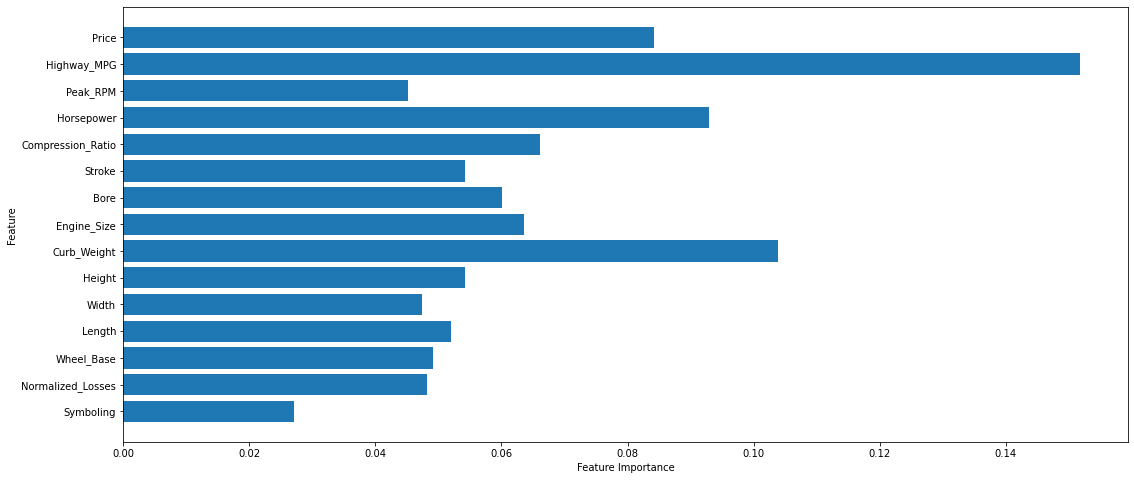

In [ ]:
print(f'Top features: ({cv_selector.n_features_} features) {cv_features}')

plt.figure(figsize=(18,8))
n_features = X_train.shape[1]
plt.barh(range(n_features), cross_val_estimator.feature_importances_, align='center') 

plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

plt.show()

Now to further reduce the number of factors, using the **Variance Inflation Factor** (VIF) method.

VIF measures the amout to which the variance of the estimated regression coefficient increases if our column factors are correlated. The higher the VIF value relative to the factor, the more it is highly correlated with the other variables.

For details, see [here](https://www.statology.org/how-to-calculate-vif-in-python/).

In [ ]:
X2 = sm.add_constant(X_train.loc[:,cv_features])

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.round(1)

,VIF Factor,features
0,1.0,const
1,1.2,Normalized_Losses
2,10.2,Curb_Weight
3,1.9,Bore
4,1.2,Stroke
5,2.1,Compression_Ratio
6,4.8,Horsepower
7,5.1,Highway_MPG
8,5.8,Price


VIF greater than 5 implies higher multicollinearity. Hence we will drop those columns.


In [ ]:
HIGH_COLINEARITY_FACTOR=5
colinear_cols = vif[vif.loc[:,'VIF Factor']>HIGH_COLINEARITY_FACTOR]
colinear_cols = list(colinear_cols.iloc[:,1])
print('Columns removed:',colinear_cols)

cars_fs_df = cars_df.loc[:,cv_features].copy()
cars_fs_df.drop(colinear_cols,axis=1,inplace=True)
cars_fs_df

Columns removed: ['Curb_Weight', 'Highway_MPG', 'Price']


,Normalized_Losses,Bore,Stroke,Compression_Ratio,Horsepower
3,164.0,3.19,3.40,10.0,102.0
4,164.0,3.19,3.40,8.0,115.0
6,158.0,3.19,3.40,8.5,110.0
8,158.0,3.13,3.40,8.3,140.0
10,192.0,3.50,2.80,8.8,101.0
...,...,...,...,...,...
200,95.0,3.78,3.15,9.5,114.0
201,95.0,3.78,3.15,8.7,160.0
202,95.0,3.58,2.87,8.8,134.0
203,95.0,3.01,3.40,23.0,106.0


Wow, far fewer columns now. Now to validate the prediction models of using these columns.

Step 5: Multiple Linear Regression & Validation
==

1. Select the models
2. Test the models
3. Find the model's P-value, $R^2$, intercept, and coefficients.
4. Predict using the final model

In [93]:
X = cars_fs_df
y = numeric_cars_df.iloc[:,0].copy()
X_train_five_factors, X_test_five_factors, y_train_five_factors, y_test_five_factors = train_test_split(X, y, test_size=0.3, random_state=12)

model_five = LinearRegression()
scores_five = cross_val_score(model_five, X_train_five_factors, y_train_five_factors, cv=10)

def displayScore(scores):
  print('Model predicition accuracy for each of the ten subsets of the data:\n',scores,'\n')
  print('Mean Accuracy:', np.mean(scores))  
displayScore(scores_five)

Model predicition accuracy for each of the ten subsets of the data:
 [0.4623863  0.79292969 0.25943544 0.66637738 0.65644096 0.72641737
 0.83915862 0.77117837 0.59513553 0.74063502] 

Mean Accuracy: 0.6510094673405968


The first model was set up with the numeric features that passed the VIF test, and is predicted to hold a 65.10% prediction accuracy. 

In [94]:
X3 = sm.add_constant(X_train_five_factors)
result_five = sm.OLS(y_train_five_factors, X3).fit()
print(result_five.summary())

                            OLS Regression Results                            
Dep. Variable:               City_MPG   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     55.99
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           4.43e-28
Time:                        23:22:20   Log-Likelihood:                -291.02
No. Observations:                 111   AIC:                             594.0
Df Residuals:                     105   BIC:                             610.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                50.6596      6.32

65% accuracy may be lower than expected; perhpas too many features were removed. The conditional number is much above 30, implying high colinearity. 

Or perhpas it is simply a model that will predict other models well, not simply the current model. Indeed, only 2/5 features have a p-value (`P>|t|`) above 0.05. 

Here is the adjusted R-squared accuracy test:

In [95]:
print("Adjusted R squared:",result.rsquared_adj)

Adjusted R squared: 0.714265133122995


Slightly better than the previous test, at 71%.

###So a second model will be constructed with the features before further removing features with VIF.

In [96]:
model_sp_features = LinearRegression()
scores_sp = cross_val_score(model_sp_features, X2, y_train, cv=10)
displayScore(scores_sp)

Model predicition accuracy for each of the ten subsets of the data:
 [0.95343982 0.91748456 0.86165161 0.92538711 0.93496798 0.93171694
 0.9435506  0.95749407 0.942977   0.94768525] 

Mean Accuracy: 0.9316354940343669


The prediction accuracy is indeed much higher, at 93.16%!

In [97]:
result = sm.OLS(y_train, X2).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               City_MPG   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     310.0
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           5.90e-68
Time:                        23:22:20   Log-Likelihood:                -183.78
No. Observations:                 111   AIC:                             385.6
Df Residuals:                     102   BIC:                             409.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                26.4505      0.12

The low `Conditional Number` is promising. But most p-values are above 0.05.

And the R squared test:

In [98]:
print("Adjusted R squared:",result.rsquared_adj)

Adjusted R squared: 0.9573991544860414


Also higher than the last test from this model and the last test from the last model.

Here is a visual of predictions using both these models:

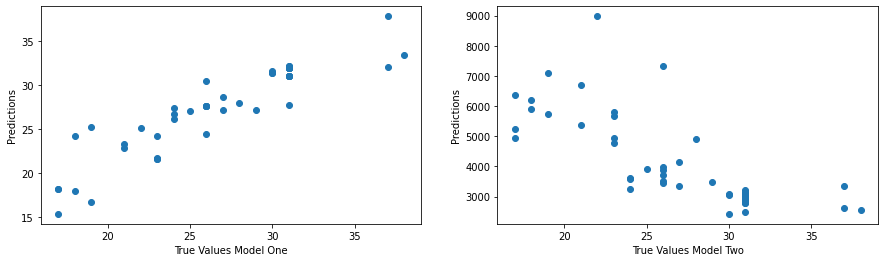

In [112]:
def scatterPlot(X_tr,y_tr, X_te,y_te,model_name):
  model_sp_features.fit(X_tr, y_tr) 
  y_pred = model_sp_features.predict(X_te)
  plt.scatter(y_te,y_pred)

  plt.xlabel('True Values ' + model_name)
  plt.ylabel('Predictions')

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
scatterPlot(X_train_five_factors,y_train_five_factors,X_test_five_factors,y_test_five_factors,'Model One')

plt.subplot(1,2,2)
scatterPlot(X_train,y_train,X_test,y_test,'Model Two')

The predicted values generally correlate with the real, tested values. Even for the first model (and perhaps with even less outliers).

Thus the 5 final features to be kept are from the first model, namely:
`Normalized_Losses`, `Bore`, `Stroke`, `Compression_Ratio`, and `Horsepower`.

Part 6: Conclusion
==

> **Research Question**: To what extent can the independent variables predict the average miles/gallon (MPG) for a city car?


A multiple linear regression was run to predict the average MPG for cars in the city from features: `Normalized_Losses`, `Bore`, `Stroke`, `Compression_Ratio`, and `Horsepower`. Though these variables held an $R^2$ score of 71%, the predicted values plotted appeared to included slightly fewer outlier than the model with a score of 96%. Granted, the p-values were not all below 0.05, but based on the visual this model appeared more accurate.

`Horsepower` appears to be the only feature with more significant correlation to `City_MPG`, with a negative correlation. The average MPG for a car in the city is reduced when the engine's power is increasing. `Bore` and `Normalized_Losses` as well, but much less so. (See Part 3, after the data cleaning.) The other features do not appear to have much significant correlation. 

Ultimately, one should consider purchasing a car with higher horespower, and perhpas smaller bore and lower normalized losses, for a car's lower MPG in the city.